In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches

import os
import math
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/perez/anaconda3/bin/python -m pip install --upgrade pip' command.


### Gaussians

In [4]:
##############
# PARAMETERS #
##############

# gaussian, mean
epsilon = 0.7

# number of events
N = 1000000

# requested number of ensembles
n_ensembles = 10000

# number of expected background events per ensemble
B_expected = 50000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = 0.01

# Working points (to select signal enriched regions)
WP = [0.25, 0.5, 0.75]



# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = 500

# S/\sqrt{B}
SsqrtB = 500/(50000)**0.5

In [5]:
store_AUC = []

store_Z_bins_XG_10bins = []
store_Z_bins_XG_25bins = []
store_Z_bins_XG_50bins = []
store_Z_bins_XG_100bins = []

store_muhat_mean_gaussian = []
store_Z_gaussian = []

store_muhat_mean_MLL_KDE = []
store_Z_KDE_bins = []
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

SrootB_WP0 = []
SrootB_WP1 = []
SrootB_WP2 = []

## Dim=1

(1000000, 1)
(1000000, 1)
(1000000, 1)
(1000000, 1)


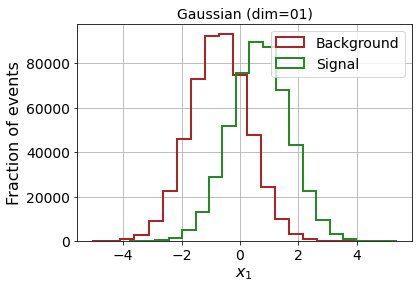

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.66054	validation_1-logloss:0.66048
[1]	validation_0-logloss:0.63398	validation_1-logloss:0.63386
[2]	validation_0-logloss:0.61186	validation_1-logloss:0.61169
[3]	validation_0-logloss:0.59375	validation_1-logloss:0.59352
[4]	validation_0-logloss:0.57841	validation_1-logloss:0.57815
[5]	validation_0-logloss:0.56554	validation_1-logloss:0.56524
[6]	validation_0-logloss:0.55481	validation_1-logloss:0.55447
[7]	validation_0-logloss:0.54572	validation_1-logloss:0.54536
[8]	validation_0-logloss:0.53800	validation_1-logloss:0.53761
[9]	validation_0-logloss:0.53147	validation_1-logloss:0.53105
[10]	validation_0-logloss:0.52593	validation_1-logloss:0.52549
[11]	validation_0-logloss:0.52118	validation_1-logloss:0.52071
[12]	validation_0-logloss:0.51712	validation_1-logloss:0.51663
[13]	validation_0-logloss:0.51374	validation_1-logloss:0.51324
[14]	validation_0-logloss:0.51106	validation_1-logloss:0.51055
[15]	validation_0-logloss:0.50859	validation_1-logloss:0.50806
[1

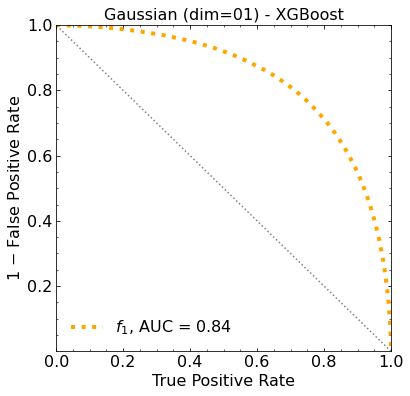

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


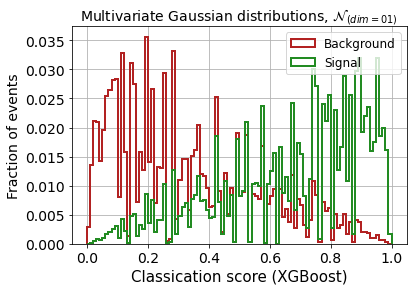

Classification score interpolation:


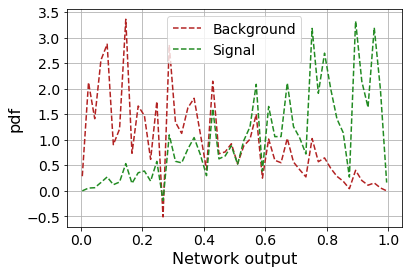


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  4.9406776979428555

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  5.232173258010593

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  5.336507130289508

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  5.362738705477286

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


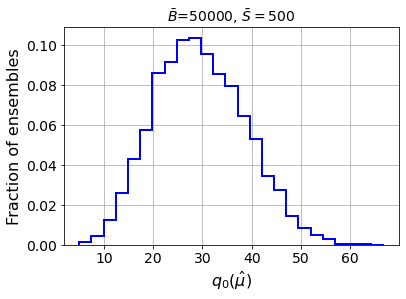

muhat mean:  0.10285930900032493
median q_muhat:  29.013759563403028
Z_gaussian:  5.386442199021821

 ------------------------------------ 

 MLL + KDE 


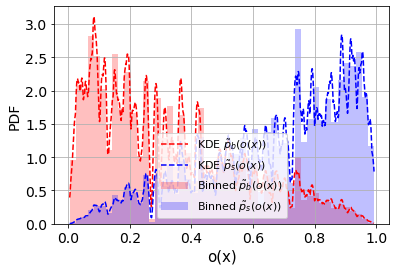

Z_KDE_bins :  5.25450514997701


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



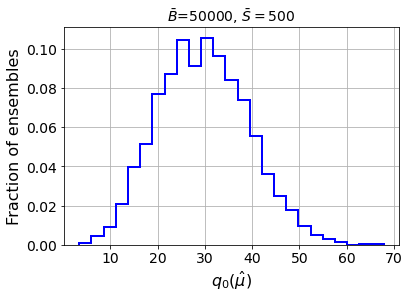

muhat mean:  0.08059135708870356
median q_muhat:  29.532933153236968
Z_KDE:  5.434421142425103
Z_KDE mu=0:  5.434977032748184

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  2.8451437391054872
WP:  0.5     S/B**0.5=  3.445723881580067
WP:  0.75     S/B**0.5=  3.989910755158116
------------------------


In [7]:
dim=1

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]
    
q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

# bandwidth = np.logspace(-4.0, 0, 20)

# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_SM[:50000]])
# print('Background: ', grid.best_estimator_)

# SM_bandwidth = grid.best_estimator_.bandwidth



# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_NP[:50000]])
# print('Signal: ', grid.best_estimator_)

# NP_bandwidth = grid.best_estimator_.bandwidth

SM_bandwidth = 0.012742749857031334
NP_bandwidth = 0.012742749857031334


# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [8]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  1
0.8392646757152371
4.9406776979428555
5.232173258010593
5.336507130289508
5.362738705477286
0.10285930900032493
5.386442199021821
0.08059135708870356
5.25450514997701
5.434421142425103
5.434977032748184
2.8451437391054872
3.445723881580067
3.989910755158116


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=2

(1000000, 2)
(1000000, 1)
(1000000, 2)
(1000000, 1)


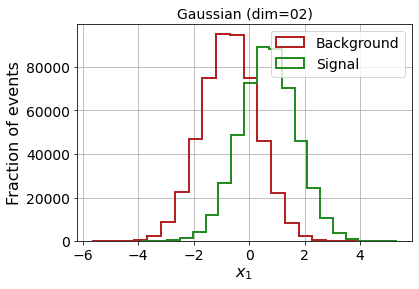

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.64280	validation_1-logloss:0.64290
[1]	validation_0-logloss:0.60128	validation_1-logloss:0.60150
[2]	validation_0-logloss:0.56694	validation_1-logloss:0.56722
[3]	validation_0-logloss:0.53791	validation_1-logloss:0.53826
[4]	validation_0-logloss:0.51367	validation_1-logloss:0.51407
[5]	validation_0-logloss:0.49276	validation_1-logloss:0.49322
[6]	validation_0-logloss:0.47519	validation_1-logloss:0.47570
[7]	validation_0-logloss:0.45996	validation_1-logloss:0.46051
[8]	validation_0-logloss:0.44683	validation_1-logloss:0.44741
[9]	validation_0-logloss:0.43548	validation_1-logloss:0.43611
[10]	validation_0-logloss:0.42567	validation_1-logloss:0.42633
[11]	validation_0-logloss:0.41723	validation_1-logloss:0.41793
[12]	validation_0-logloss:0.40978	validation_1-logloss:0.41051
[13]	validation_0-logloss:0.40345	validation_1-logloss:0.40421
[14]	validation_0-logloss:0.39789	validation_1-logloss:0.39869
[15]	validation_0-logloss:0.39298	validation_1-logloss:0.39381
[1

[130]	validation_0-logloss:0.35940	validation_1-logloss:0.36135
[131]	validation_0-logloss:0.35939	validation_1-logloss:0.36135
[132]	validation_0-logloss:0.35939	validation_1-logloss:0.36135
[133]	validation_0-logloss:0.35938	validation_1-logloss:0.36135
[134]	validation_0-logloss:0.35938	validation_1-logloss:0.36135
[135]	validation_0-logloss:0.35937	validation_1-logloss:0.36135


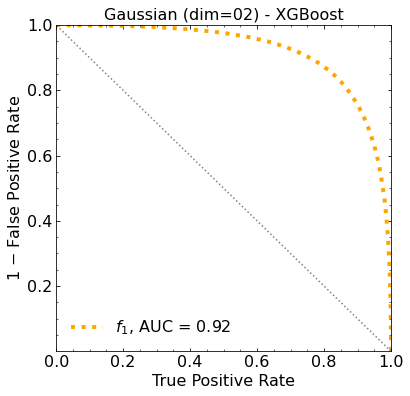

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


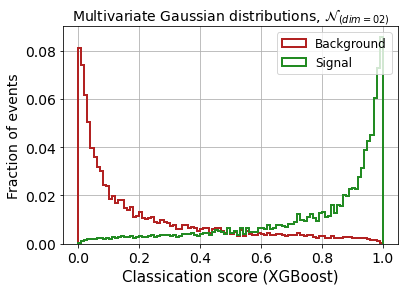

Classification score interpolation:


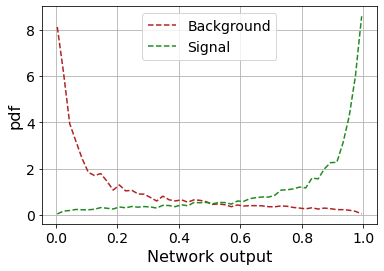


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  7.503423297111014

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  8.740371377101658

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  9.375018649905504

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  9.654770821380612

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


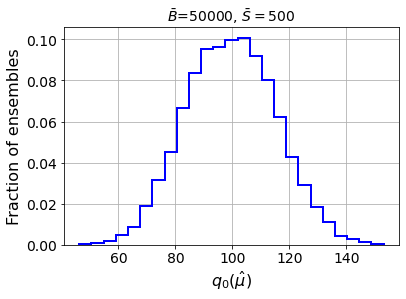

muhat mean:  0.04924726524423264
median q_muhat:  99.55089777297064
Z_gaussian:  9.977519620274903

 ------------------------------------ 

 MLL + KDE 


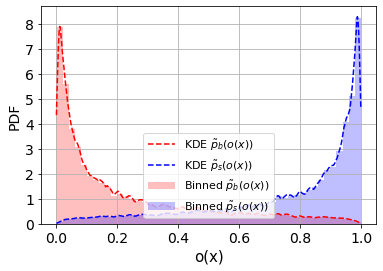

Z_KDE_bins :  9.035763412346451


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



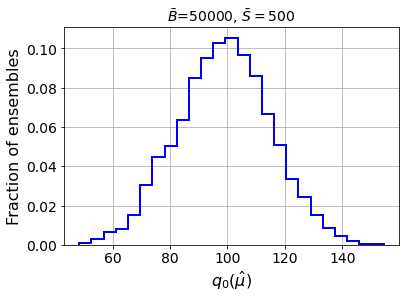

muhat mean:  0.017534929058810784
median q_muhat:  99.01451682079801
Z_KDE:  9.950603842018735
Z_KDE mu=0:  9.950603842018735

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  3.6390654215096334
WP:  0.5     S/B**0.5=  4.685983643305905
WP:  0.75     S/B**0.5=  6.057939119610567
------------------------


In [9]:
dim=2

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

# bandwidth = np.logspace(-4.0, 0, 20)

# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_SM[:50000]])
# print('Background: ', grid.best_estimator_)

# SM_bandwidth = grid.best_estimator_.bandwidth



# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_NP[:50000]])
# print('Signal: ', grid.best_estimator_)

# NP_bandwidth = grid.best_estimator_.bandwidth

SM_bandwidth = 0.012742749857031334
NP_bandwidth = 0.012742749857031334


# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [10]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  2
0.9190185927107288
7.503423297111014
8.740371377101658
9.375018649905504
9.654770821380612
0.04924726524423264
9.977519620274903
0.017534929058810784
9.035763412346451
9.950603842018735
9.950603842018735
3.6390654215096334
4.685983643305905
6.057939119610567


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=3

(1000000, 3)
(1000000, 1)
(1000000, 3)
(1000000, 1)


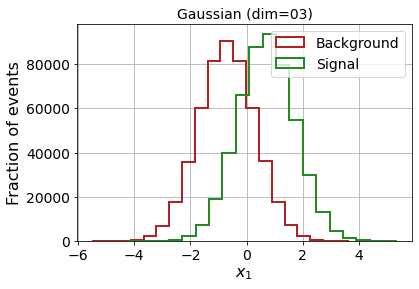

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.63360	validation_1-logloss:0.63366
[1]	validation_0-logloss:0.58548	validation_1-logloss:0.58557
[2]	validation_0-logloss:0.54434	validation_1-logloss:0.54449
[3]	validation_0-logloss:0.50956	validation_1-logloss:0.50974
[4]	validation_0-logloss:0.48043	validation_1-logloss:0.48064
[5]	validation_0-logloss:0.45486	validation_1-logloss:0.45513
[6]	validation_0-logloss:0.43287	validation_1-logloss:0.43318
[7]	validation_0-logloss:0.41383	validation_1-logloss:0.41418
[8]	validation_0-logloss:0.39725	validation_1-logloss:0.39763
[9]	validation_0-logloss:0.38267	validation_1-logloss:0.38305
[10]	validation_0-logloss:0.36985	validation_1-logloss:0.37026
[11]	validation_0-logloss:0.35866	validation_1-logloss:0.35913
[12]	validation_0-logloss:0.34857	validation_1-logloss:0.34908
[13]	validation_0-logloss:0.33984	validation_1-logloss:0.34037
[14]	validation_0-logloss:0.33208	validation_1-logloss:0.33264
[15]	validation_0-logloss:0.32508	validation_1-logloss:0.32566
[1

[130]	validation_0-logloss:0.26491	validation_1-logloss:0.26650
[131]	validation_0-logloss:0.26490	validation_1-logloss:0.26651
[132]	validation_0-logloss:0.26489	validation_1-logloss:0.26650
[133]	validation_0-logloss:0.26489	validation_1-logloss:0.26650
[134]	validation_0-logloss:0.26488	validation_1-logloss:0.26650
[135]	validation_0-logloss:0.26488	validation_1-logloss:0.26651
[136]	validation_0-logloss:0.26488	validation_1-logloss:0.26651
[137]	validation_0-logloss:0.26486	validation_1-logloss:0.26651
[138]	validation_0-logloss:0.26485	validation_1-logloss:0.26651
[139]	validation_0-logloss:0.26485	validation_1-logloss:0.26651
[140]	validation_0-logloss:0.26483	validation_1-logloss:0.26651
[141]	validation_0-logloss:0.26483	validation_1-logloss:0.26651
[142]	validation_0-logloss:0.26482	validation_1-logloss:0.26651
[143]	validation_0-logloss:0.26482	validation_1-logloss:0.26651
[144]	validation_0-logloss:0.26482	validation_1-logloss:0.26651
[145]	validation_0-logloss:0.26481	valid

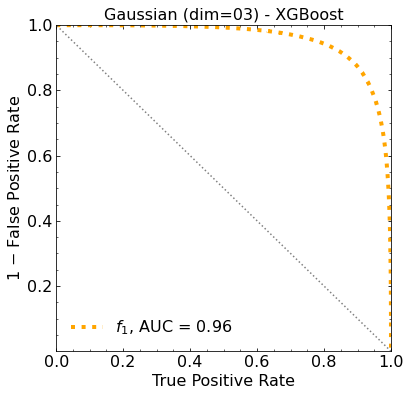

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


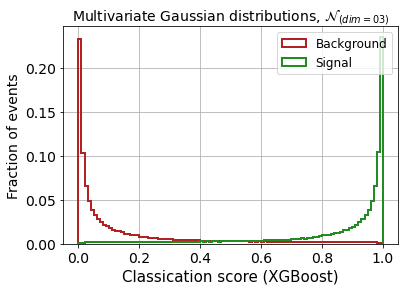

Classification score interpolation:


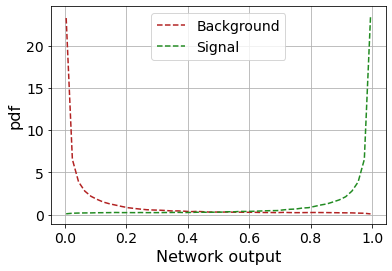


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  9.924590794383294

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  12.01286465428304

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  13.137487768398627

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  13.87114974239367

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


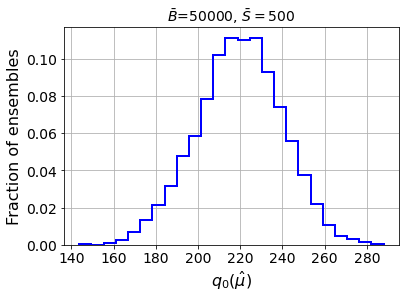

muhat mean:  0.010798223762590708
median q_muhat:  219.99443085052985
Z_gaussian:  14.832209237012869

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0018329807108324356,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0011288378916846883,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


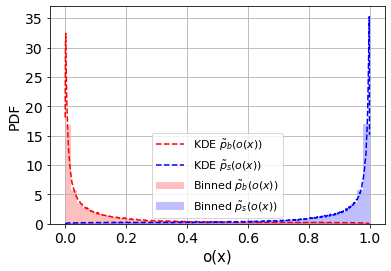

Z_KDE_bins :  14.309480906394604


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



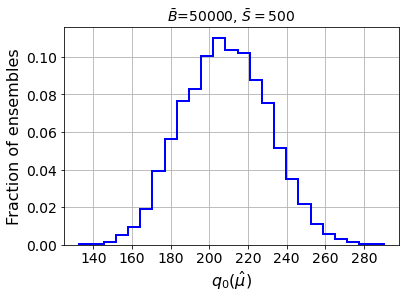

muhat mean:  0.03434420015163002
median q_muhat:  208.16109733212238
Z_KDE:  14.427789065969963
Z_KDE mu=0:  14.466619933240253

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  4.5411365860317225
WP:  0.5     S/B**0.5=  5.887690580637729
WP:  0.75     S/B**0.5=  7.803592276477235
------------------------


In [11]:
dim=3

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [12]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  3
0.9566784118746786
9.924590794383294
12.01286465428304
13.137487768398627
13.87114974239367
0.010798223762590708
14.832209237012869
0.03434420015163002
14.309480906394604
14.427789065969963
14.466619933240253
4.5411365860317225
5.887690580637729
7.803592276477235


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=4

(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)


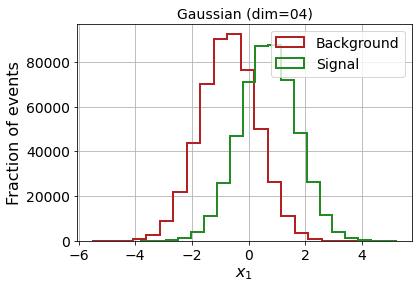

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.62967	validation_1-logloss:0.62992
[1]	validation_0-logloss:0.57617	validation_1-logloss:0.57667
[2]	validation_0-logloss:0.53118	validation_1-logloss:0.53190
[3]	validation_0-logloss:0.49333	validation_1-logloss:0.49424
[4]	validation_0-logloss:0.46049	validation_1-logloss:0.46159
[5]	validation_0-logloss:0.43198	validation_1-logloss:0.43324
[6]	validation_0-logloss:0.40699	validation_1-logloss:0.40837
[7]	validation_0-logloss:0.38535	validation_1-logloss:0.38688
[8]	validation_0-logloss:0.36655	validation_1-logloss:0.36824
[9]	validation_0-logloss:0.34970	validation_1-logloss:0.35150
[10]	validation_0-logloss:0.33483	validation_1-logloss:0.33674
[11]	validation_0-logloss:0.32174	validation_1-logloss:0.32380
[12]	validation_0-logloss:0.30987	validation_1-logloss:0.31205
[13]	validation_0-logloss:0.29913	validation_1-logloss:0.30140
[14]	validation_0-logloss:0.28975	validation_1-logloss:0.29211
[15]	validation_0-logloss:0.28134	validation_1-logloss:0.28380
[1

[130]	validation_0-logloss:0.19530	validation_1-logloss:0.19998
[131]	validation_0-logloss:0.19529	validation_1-logloss:0.19998
[132]	validation_0-logloss:0.19528	validation_1-logloss:0.19998
[133]	validation_0-logloss:0.19528	validation_1-logloss:0.19998
[134]	validation_0-logloss:0.19526	validation_1-logloss:0.19998
[135]	validation_0-logloss:0.19525	validation_1-logloss:0.19997
[136]	validation_0-logloss:0.19524	validation_1-logloss:0.19997
[137]	validation_0-logloss:0.19523	validation_1-logloss:0.19997
[138]	validation_0-logloss:0.19523	validation_1-logloss:0.19997
[139]	validation_0-logloss:0.19522	validation_1-logloss:0.19997
[140]	validation_0-logloss:0.19521	validation_1-logloss:0.19997
[141]	validation_0-logloss:0.19520	validation_1-logloss:0.19997
[142]	validation_0-logloss:0.19520	validation_1-logloss:0.19997
[143]	validation_0-logloss:0.19517	validation_1-logloss:0.19996
[144]	validation_0-logloss:0.19515	validation_1-logloss:0.19996
[145]	validation_0-logloss:0.19515	valid

[259]	validation_0-logloss:0.19429	validation_1-logloss:0.19994
[260]	validation_0-logloss:0.19428	validation_1-logloss:0.19994
[261]	validation_0-logloss:0.19428	validation_1-logloss:0.19994
[262]	validation_0-logloss:0.19428	validation_1-logloss:0.19994
[263]	validation_0-logloss:0.19427	validation_1-logloss:0.19994
[264]	validation_0-logloss:0.19427	validation_1-logloss:0.19994
[265]	validation_0-logloss:0.19426	validation_1-logloss:0.19994
[266]	validation_0-logloss:0.19425	validation_1-logloss:0.19994
[267]	validation_0-logloss:0.19425	validation_1-logloss:0.19994
[268]	validation_0-logloss:0.19423	validation_1-logloss:0.19994
[269]	validation_0-logloss:0.19423	validation_1-logloss:0.19994
[270]	validation_0-logloss:0.19422	validation_1-logloss:0.19994
[271]	validation_0-logloss:0.19420	validation_1-logloss:0.19994
[272]	validation_0-logloss:0.19420	validation_1-logloss:0.19994
[273]	validation_0-logloss:0.19418	validation_1-logloss:0.19995
[274]	validation_0-logloss:0.19418	valid

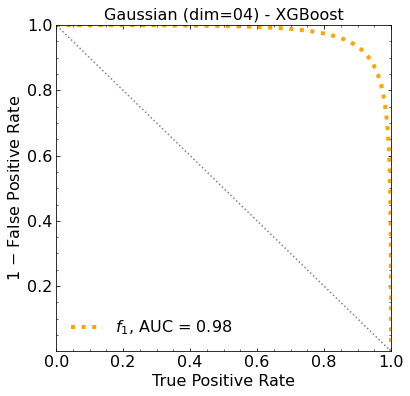

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


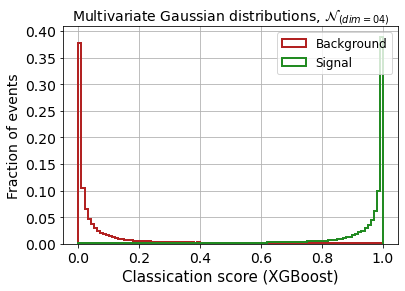

Classification score interpolation:


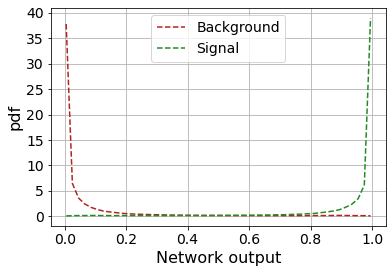


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  11.677723231035078

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  14.367008246330212

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  15.686305137479303

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  16.52041365159221

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


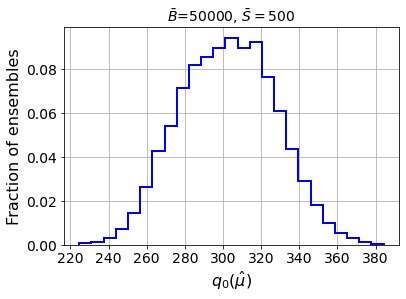

muhat mean:  0.03901223870897866
median q_muhat:  302.883161761318
Z_gaussian:  17.40353877121886

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0011288378916846883,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0011288378916846883,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


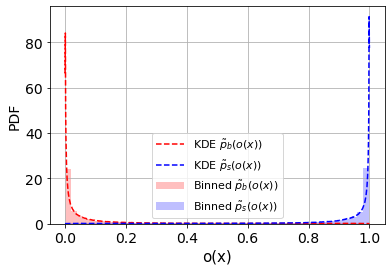

Z_KDE_bins :  17.254924805159757


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



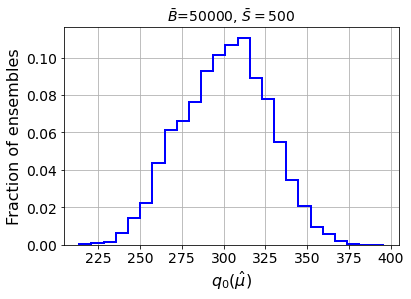

muhat mean:  0.027195927650817717
median q_muhat:  301.9626403347713
Z_KDE:  17.37707226015854
Z_KDE mu=0:  17.399012826296943

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  5.575332192224812
WP:  0.5     S/B**0.5=  7.18781781933289
WP:  0.75     S/B**0.5=  9.454530957512315
------------------------


In [13]:
dim=4

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [14]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  4
0.9756779882589288
11.677723231035078
14.367008246330212
15.686305137479303
16.52041365159221
0.03901223870897866
17.40353877121886
0.027195927650817717
17.254924805159757
17.37707226015854
17.399012826296943
5.575332192224812
7.18781781933289
9.454530957512315


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=5

(1000000, 5)
(1000000, 1)
(1000000, 5)
(1000000, 1)


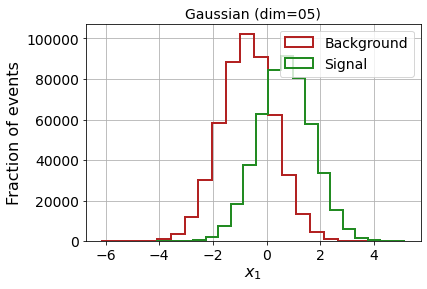

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.62626	validation_1-logloss:0.62634
[1]	validation_0-logloss:0.57050	validation_1-logloss:0.57073
[2]	validation_0-logloss:0.52301	validation_1-logloss:0.52331
[3]	validation_0-logloss:0.48213	validation_1-logloss:0.48252
[4]	validation_0-logloss:0.44682	validation_1-logloss:0.44727
[5]	validation_0-logloss:0.41632	validation_1-logloss:0.41680
[6]	validation_0-logloss:0.38964	validation_1-logloss:0.39019
[7]	validation_0-logloss:0.36615	validation_1-logloss:0.36672
[8]	validation_0-logloss:0.34529	validation_1-logloss:0.34591
[9]	validation_0-logloss:0.32696	validation_1-logloss:0.32764
[10]	validation_0-logloss:0.31059	validation_1-logloss:0.31132
[11]	validation_0-logloss:0.29594	validation_1-logloss:0.29673
[12]	validation_0-logloss:0.28283	validation_1-logloss:0.28366
[13]	validation_0-logloss:0.27107	validation_1-logloss:0.27197
[14]	validation_0-logloss:0.26064	validation_1-logloss:0.26160
[15]	validation_0-logloss:0.25122	validation_1-logloss:0.25223
[1

[130]	validation_0-logloss:0.14679	validation_1-logloss:0.15013
[131]	validation_0-logloss:0.14677	validation_1-logloss:0.15013
[132]	validation_0-logloss:0.14675	validation_1-logloss:0.15012
[133]	validation_0-logloss:0.14674	validation_1-logloss:0.15012
[134]	validation_0-logloss:0.14673	validation_1-logloss:0.15012
[135]	validation_0-logloss:0.14672	validation_1-logloss:0.15011
[136]	validation_0-logloss:0.14670	validation_1-logloss:0.15011
[137]	validation_0-logloss:0.14667	validation_1-logloss:0.15010
[138]	validation_0-logloss:0.14666	validation_1-logloss:0.15010
[139]	validation_0-logloss:0.14664	validation_1-logloss:0.15009
[140]	validation_0-logloss:0.14663	validation_1-logloss:0.15009
[141]	validation_0-logloss:0.14662	validation_1-logloss:0.15009
[142]	validation_0-logloss:0.14660	validation_1-logloss:0.15008
[143]	validation_0-logloss:0.14659	validation_1-logloss:0.15008
[144]	validation_0-logloss:0.14658	validation_1-logloss:0.15007
[145]	validation_0-logloss:0.14657	valid

[259]	validation_0-logloss:0.14563	validation_1-logloss:0.15000
[260]	validation_0-logloss:0.14562	validation_1-logloss:0.15000
[261]	validation_0-logloss:0.14562	validation_1-logloss:0.15000
[262]	validation_0-logloss:0.14561	validation_1-logloss:0.15000
[263]	validation_0-logloss:0.14561	validation_1-logloss:0.15000
[264]	validation_0-logloss:0.14560	validation_1-logloss:0.15000
[265]	validation_0-logloss:0.14559	validation_1-logloss:0.15000
[266]	validation_0-logloss:0.14558	validation_1-logloss:0.15000
[267]	validation_0-logloss:0.14557	validation_1-logloss:0.15000
[268]	validation_0-logloss:0.14557	validation_1-logloss:0.15000
[269]	validation_0-logloss:0.14557	validation_1-logloss:0.15000


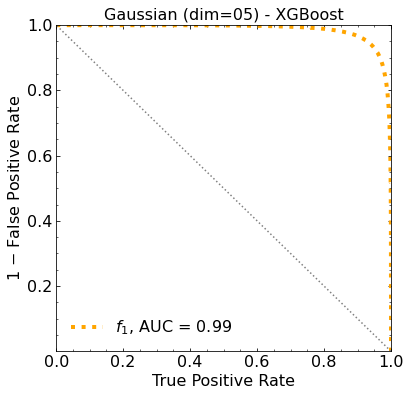

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


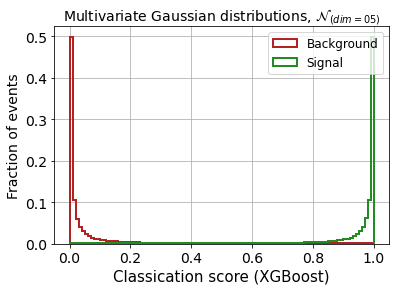

Classification score interpolation:


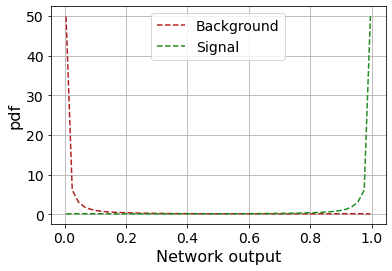


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  13.371239027201424

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  16.385645110997828

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  18.22203890075278

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  19.466187959085463

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


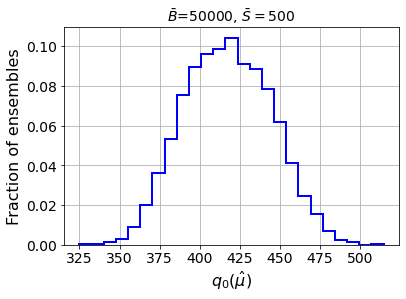

muhat mean:  0.04299794216397704
median q_muhat:  417.1488739941709
Z_gaussian:  20.42422272680581

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0011288378916846883,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0011288378916846883,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


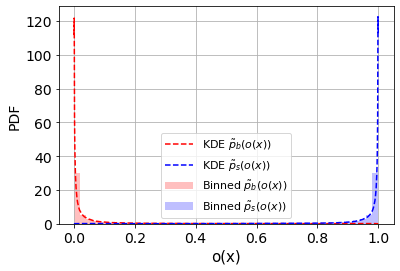

Z_KDE_bins :  20.40483289118529


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



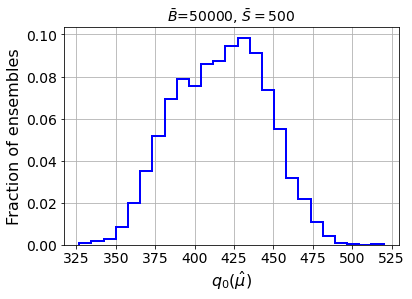

muhat mean:  0.034755767356222246
median q_muhat:  418.05016629514625
Z_KDE:  20.446275120303607
Z_KDE mu=0:  20.546796417623693

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  6.657884303320552
WP:  0.5     S/B**0.5=  8.607539607516978
WP:  0.75     S/B**0.5=  11.336374627690669
------------------------


In [15]:
dim=5

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [16]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  5
0.9862388793981833
13.371239027201424
16.385645110997828
18.22203890075278
19.466187959085463
0.04299794216397704
20.42422272680581
0.034755767356222246
20.40483289118529
20.446275120303607
20.546796417623693
6.657884303320552
8.607539607516978
11.336374627690669


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=6

(1000000, 6)
(1000000, 1)
(1000000, 6)
(1000000, 1)


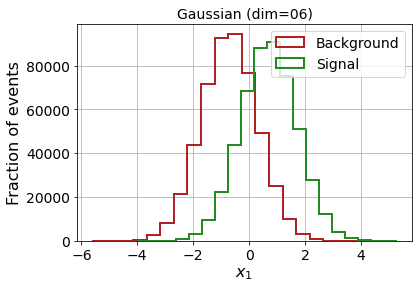

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.62596	validation_1-logloss:0.62619
[1]	validation_0-logloss:0.56956	validation_1-logloss:0.56986
[2]	validation_0-logloss:0.52105	validation_1-logloss:0.52151
[3]	validation_0-logloss:0.47901	validation_1-logloss:0.47959
[4]	validation_0-logloss:0.44255	validation_1-logloss:0.44326
[5]	validation_0-logloss:0.41073	validation_1-logloss:0.41152
[6]	validation_0-logloss:0.38261	validation_1-logloss:0.38348
[7]	validation_0-logloss:0.35802	validation_1-logloss:0.35890
[8]	validation_0-logloss:0.33558	validation_1-logloss:0.33651
[9]	validation_0-logloss:0.31587	validation_1-logloss:0.31689
[10]	validation_0-logloss:0.29850	validation_1-logloss:0.29961
[11]	validation_0-logloss:0.28252	validation_1-logloss:0.28364
[12]	validation_0-logloss:0.26842	validation_1-logloss:0.26961
[13]	validation_0-logloss:0.25571	validation_1-logloss:0.25693
[14]	validation_0-logloss:0.24407	validation_1-logloss:0.24532
[15]	validation_0-logloss:0.23364	validation_1-logloss:0.23492
[1

[130]	validation_0-logloss:0.10949	validation_1-logloss:0.11287
[131]	validation_0-logloss:0.10946	validation_1-logloss:0.11285
[132]	validation_0-logloss:0.10944	validation_1-logloss:0.11283
[133]	validation_0-logloss:0.10941	validation_1-logloss:0.11281
[134]	validation_0-logloss:0.10938	validation_1-logloss:0.11280
[135]	validation_0-logloss:0.10935	validation_1-logloss:0.11278
[136]	validation_0-logloss:0.10933	validation_1-logloss:0.11277
[137]	validation_0-logloss:0.10931	validation_1-logloss:0.11275
[138]	validation_0-logloss:0.10928	validation_1-logloss:0.11273
[139]	validation_0-logloss:0.10925	validation_1-logloss:0.11272
[140]	validation_0-logloss:0.10923	validation_1-logloss:0.11271
[141]	validation_0-logloss:0.10920	validation_1-logloss:0.11270
[142]	validation_0-logloss:0.10918	validation_1-logloss:0.11268
[143]	validation_0-logloss:0.10916	validation_1-logloss:0.11267
[144]	validation_0-logloss:0.10913	validation_1-logloss:0.11267
[145]	validation_0-logloss:0.10910	valid

[259]	validation_0-logloss:0.10799	validation_1-logloss:0.11245
[260]	validation_0-logloss:0.10798	validation_1-logloss:0.11245
[261]	validation_0-logloss:0.10797	validation_1-logloss:0.11245
[262]	validation_0-logloss:0.10795	validation_1-logloss:0.11245
[263]	validation_0-logloss:0.10795	validation_1-logloss:0.11245
[264]	validation_0-logloss:0.10794	validation_1-logloss:0.11245
[265]	validation_0-logloss:0.10794	validation_1-logloss:0.11245
[266]	validation_0-logloss:0.10793	validation_1-logloss:0.11245
[267]	validation_0-logloss:0.10793	validation_1-logloss:0.11245
[268]	validation_0-logloss:0.10793	validation_1-logloss:0.11245
[269]	validation_0-logloss:0.10792	validation_1-logloss:0.11245
[270]	validation_0-logloss:0.10791	validation_1-logloss:0.11246
[271]	validation_0-logloss:0.10791	validation_1-logloss:0.11246
[272]	validation_0-logloss:0.10791	validation_1-logloss:0.11246
[273]	validation_0-logloss:0.10790	validation_1-logloss:0.11246
[274]	validation_0-logloss:0.10790	valid

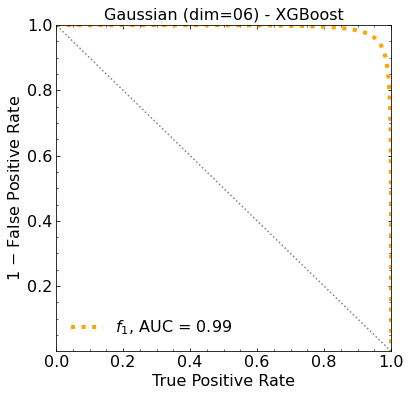

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


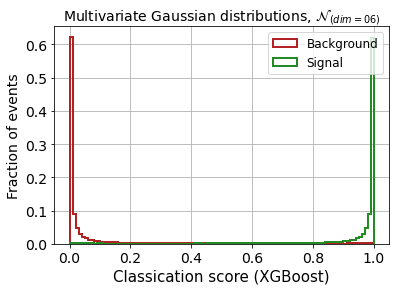

Classification score interpolation:


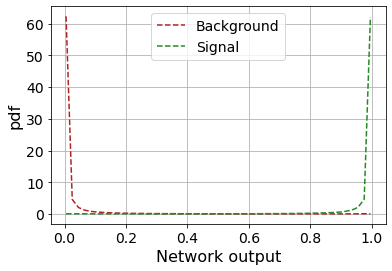


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  15.470507706558566

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  18.388638383786038

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  20.47665809494011

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  21.750376566644796

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


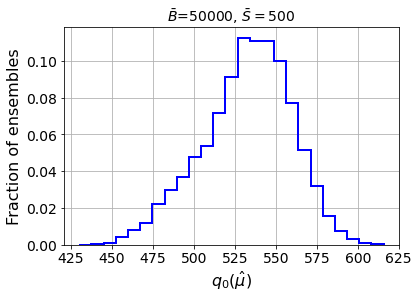

muhat mean:  0.013072674103758257
median q_muhat:  534.5795497483984
Z_gaussian:  23.120976401276796

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0018329807108324356,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0018329807108324356,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


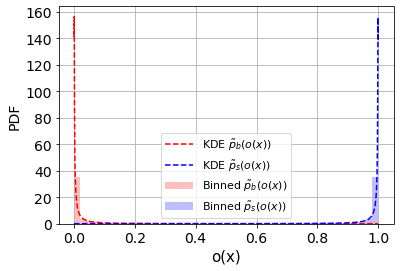

Z_KDE_bins :  22.141158065483644


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



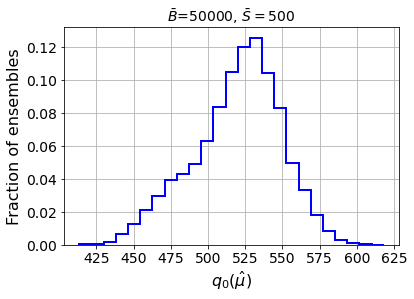

muhat mean:  0.016332719592765083
median q_muhat:  523.1392449536138
Z_KDE:  22.872237427799096
Z_KDE mu=0:  22.882372077878777

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  7.8060232721404565
WP:  0.5     S/B**0.5=  10.239560640146882
WP:  0.75     S/B**0.5=  13.741884751193309
------------------------


In [17]:
dim=6

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [18]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  6
0.9921660693577878
15.470507706558566
18.388638383786038
20.47665809494011
21.750376566644796
0.013072674103758257
23.120976401276796
0.016332719592765083
22.141158065483644
22.872237427799096
22.882372077878777
7.8060232721404565
10.239560640146882
13.741884751193309


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=7

(1000000, 7)
(1000000, 1)
(1000000, 7)
(1000000, 1)


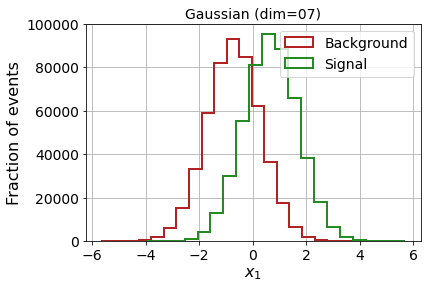

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.62580	validation_1-logloss:0.62613
[1]	validation_0-logloss:0.56905	validation_1-logloss:0.56953
[2]	validation_0-logloss:0.52009	validation_1-logloss:0.52065
[3]	validation_0-logloss:0.47716	validation_1-logloss:0.47775
[4]	validation_0-logloss:0.44010	validation_1-logloss:0.44074
[5]	validation_0-logloss:0.40746	validation_1-logloss:0.40810
[6]	validation_0-logloss:0.37842	validation_1-logloss:0.37910
[7]	validation_0-logloss:0.35280	validation_1-logloss:0.35356
[8]	validation_0-logloss:0.33000	validation_1-logloss:0.33078
[9]	validation_0-logloss:0.30954	validation_1-logloss:0.31033
[10]	validation_0-logloss:0.29100	validation_1-logloss:0.29183
[11]	validation_0-logloss:0.27457	validation_1-logloss:0.27542
[12]	validation_0-logloss:0.25960	validation_1-logloss:0.26049
[13]	validation_0-logloss:0.24607	validation_1-logloss:0.24697
[14]	validation_0-logloss:0.23374	validation_1-logloss:0.23468
[15]	validation_0-logloss:0.22263	validation_1-logloss:0.22359
[1

[130]	validation_0-logloss:0.08248	validation_1-logloss:0.08549
[131]	validation_0-logloss:0.08243	validation_1-logloss:0.08545
[132]	validation_0-logloss:0.08239	validation_1-logloss:0.08542
[133]	validation_0-logloss:0.08234	validation_1-logloss:0.08539
[134]	validation_0-logloss:0.08229	validation_1-logloss:0.08536
[135]	validation_0-logloss:0.08227	validation_1-logloss:0.08534
[136]	validation_0-logloss:0.08223	validation_1-logloss:0.08531
[137]	validation_0-logloss:0.08218	validation_1-logloss:0.08529
[138]	validation_0-logloss:0.08215	validation_1-logloss:0.08527
[139]	validation_0-logloss:0.08211	validation_1-logloss:0.08524
[140]	validation_0-logloss:0.08207	validation_1-logloss:0.08522
[141]	validation_0-logloss:0.08203	validation_1-logloss:0.08520
[142]	validation_0-logloss:0.08200	validation_1-logloss:0.08518
[143]	validation_0-logloss:0.08197	validation_1-logloss:0.08515
[144]	validation_0-logloss:0.08194	validation_1-logloss:0.08513
[145]	validation_0-logloss:0.08191	valid

[259]	validation_0-logloss:0.08028	validation_1-logloss:0.08460
[260]	validation_0-logloss:0.08027	validation_1-logloss:0.08460
[261]	validation_0-logloss:0.08027	validation_1-logloss:0.08460
[262]	validation_0-logloss:0.08026	validation_1-logloss:0.08460
[263]	validation_0-logloss:0.08026	validation_1-logloss:0.08460
[264]	validation_0-logloss:0.08025	validation_1-logloss:0.08460
[265]	validation_0-logloss:0.08024	validation_1-logloss:0.08460
[266]	validation_0-logloss:0.08023	validation_1-logloss:0.08460
[267]	validation_0-logloss:0.08023	validation_1-logloss:0.08460
[268]	validation_0-logloss:0.08023	validation_1-logloss:0.08460
[269]	validation_0-logloss:0.08022	validation_1-logloss:0.08460
[270]	validation_0-logloss:0.08021	validation_1-logloss:0.08460
[271]	validation_0-logloss:0.08019	validation_1-logloss:0.08460
[272]	validation_0-logloss:0.08017	validation_1-logloss:0.08460
[273]	validation_0-logloss:0.08016	validation_1-logloss:0.08460
[274]	validation_0-logloss:0.08015	valid

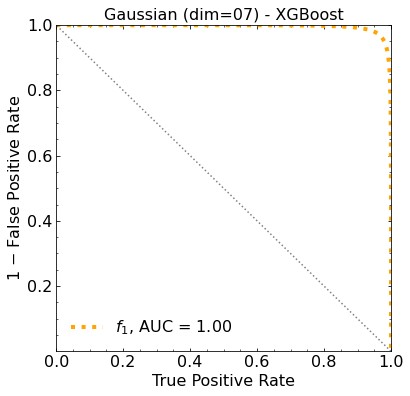

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


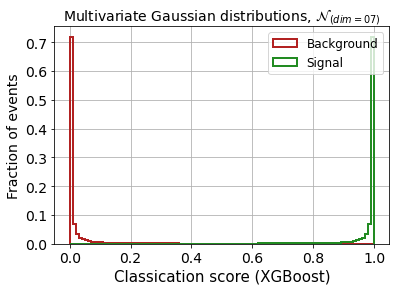

Classification score interpolation:


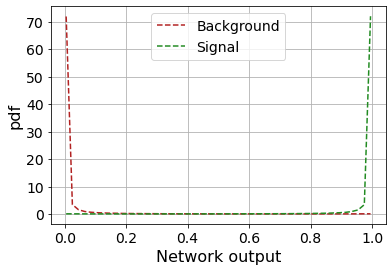


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  17.3674359490689

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  20.23079527118046

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  22.0347732398307

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  23.452828673955466

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


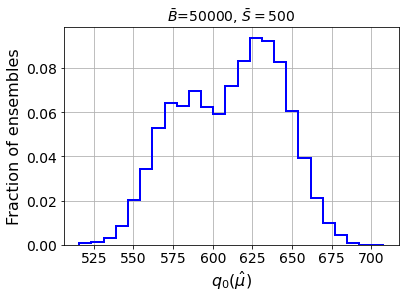

muhat mean:  0.035059027401711254
median q_muhat:  614.4330449934605
Z_gaussian:  24.78775998337608

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0018329807108324356,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0018329807108324356,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


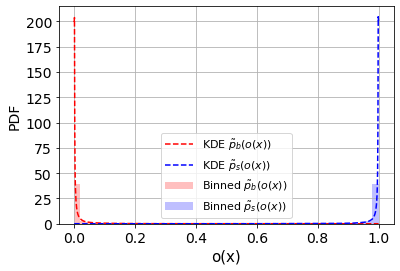

Z_KDE_bins :  23.84767523470251


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



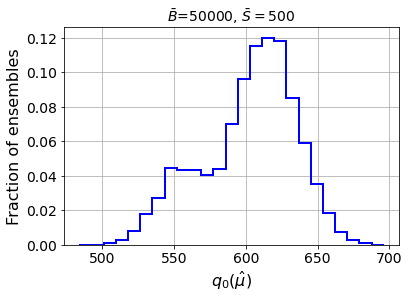

muhat mean:  0.021271526047871765
median q_muhat:  607.6631821901981
Z_KDE:  24.650825182743844
Z_KDE mu=0:  24.671260252733045

 -------------------------------- 

Working points, counting over 1 bin:
S_expected =  500
WP: 0     S/B**0.5=  2.23606797749979
WP:  0.25     S/B**0.5=  9.108075499536744
WP:  0.5     S/B**0.5=  12.075736817105442
WP:  0.75     S/B**0.5=  16.376111648022352
------------------------


In [19]:
dim=7

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [20]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  7
0.9954950701113967
17.3674359490689
20.23079527118046
22.0347732398307
23.452828673955466
0.035059027401711254
24.78775998337608
0.021271526047871765
23.84767523470251
24.650825182743844
24.671260252733045
9.108075499536744
12.075736817105442
16.376111648022352


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=8

(1000000, 8)
(1000000, 1)
(1000000, 8)
(1000000, 1)


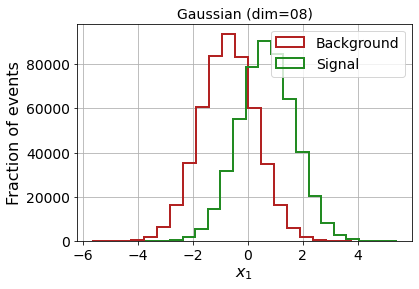

/home/perez/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

[0]	validation_0-logloss:0.62593	validation_1-logloss:0.62618
[1]	validation_0-logloss:0.56860	validation_1-logloss:0.56897
[2]	validation_0-logloss:0.51826	validation_1-logloss:0.51874
[3]	validation_0-logloss:0.47607	validation_1-logloss:0.47669
[4]	validation_0-logloss:0.43833	validation_1-logloss:0.43903
[5]	validation_0-logloss:0.40519	validation_1-logloss:0.40593
[6]	validation_0-logloss:0.37554	validation_1-logloss:0.37628
[7]	validation_0-logloss:0.34938	validation_1-logloss:0.35013
[8]	validation_0-logloss:0.32602	validation_1-logloss:0.32683
[9]	validation_0-logloss:0.30503	validation_1-logloss:0.30584
[10]	validation_0-logloss:0.28609	validation_1-logloss:0.28690
[11]	validation_0-logloss:0.26891	validation_1-logloss:0.26977
[12]	validation_0-logloss:0.25346	validation_1-logloss:0.25432
[13]	validation_0-logloss:0.23938	validation_1-logloss:0.24027
[14]	validation_0-logloss:0.22665	validation_1-logloss:0.22759
[15]	validation_0-logloss:0.21502	validation_1-logloss:0.21601
[1

[130]	validation_0-logloss:0.06302	validation_1-logloss:0.06598
[131]	validation_0-logloss:0.06297	validation_1-logloss:0.06593
[132]	validation_0-logloss:0.06291	validation_1-logloss:0.06589
[133]	validation_0-logloss:0.06286	validation_1-logloss:0.06585
[134]	validation_0-logloss:0.06280	validation_1-logloss:0.06581
[135]	validation_0-logloss:0.06275	validation_1-logloss:0.06578
[136]	validation_0-logloss:0.06270	validation_1-logloss:0.06574
[137]	validation_0-logloss:0.06265	validation_1-logloss:0.06571
[138]	validation_0-logloss:0.06260	validation_1-logloss:0.06567
[139]	validation_0-logloss:0.06255	validation_1-logloss:0.06563
[140]	validation_0-logloss:0.06250	validation_1-logloss:0.06560
[141]	validation_0-logloss:0.06246	validation_1-logloss:0.06557
[142]	validation_0-logloss:0.06241	validation_1-logloss:0.06554
[143]	validation_0-logloss:0.06237	validation_1-logloss:0.06552
[144]	validation_0-logloss:0.06234	validation_1-logloss:0.06549
[145]	validation_0-logloss:0.06230	valid

[259]	validation_0-logloss:0.06016	validation_1-logloss:0.06459
[260]	validation_0-logloss:0.06014	validation_1-logloss:0.06459
[261]	validation_0-logloss:0.06014	validation_1-logloss:0.06459
[262]	validation_0-logloss:0.06012	validation_1-logloss:0.06459
[263]	validation_0-logloss:0.06011	validation_1-logloss:0.06459
[264]	validation_0-logloss:0.06011	validation_1-logloss:0.06459
[265]	validation_0-logloss:0.06010	validation_1-logloss:0.06459
[266]	validation_0-logloss:0.06010	validation_1-logloss:0.06459
[267]	validation_0-logloss:0.06009	validation_1-logloss:0.06459
[268]	validation_0-logloss:0.06007	validation_1-logloss:0.06459
[269]	validation_0-logloss:0.06007	validation_1-logloss:0.06459
[270]	validation_0-logloss:0.06006	validation_1-logloss:0.06459
[271]	validation_0-logloss:0.06004	validation_1-logloss:0.06459
[272]	validation_0-logloss:0.06003	validation_1-logloss:0.06459
[273]	validation_0-logloss:0.06002	validation_1-logloss:0.06458
[274]	validation_0-logloss:0.06002	valid

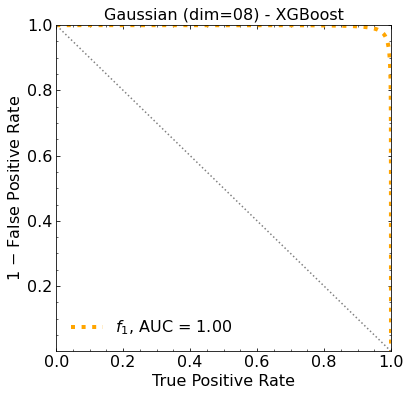

Classification score:


Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


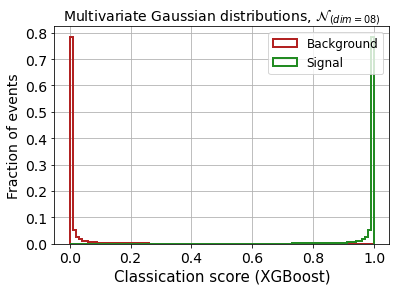

Classification score interpolation:


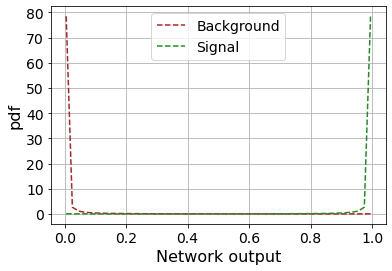


 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 10 bins:  19.216705971572285

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 25 bins:  22.06289103671506

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 50 bins:  23.591770800187124

 ----------------------------------------- 

BINNED CLASSIFIER OUTPUT
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_XG 100 bins:  24.727977136260638

 ----------------------------------------- 

TRUE PDF LIKELIHOOD (GAUSSIANS):
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233
This may take long...


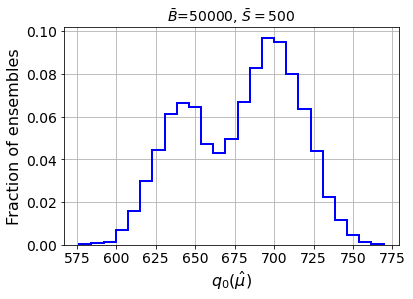

muhat mean:  0.0353839488790209
median q_muhat:  684.7566056424664
Z_gaussian:  26.16785443330168

 ------------------------------------ 

 MLL + KDE 


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Background:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.0018329807108324356,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


/home/perez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


Signal:  KernelDensity(algorithm='auto', atol=0, bandwidth=0.002976351441631319,
              breadth_first=True, kernel='epanechnikov', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


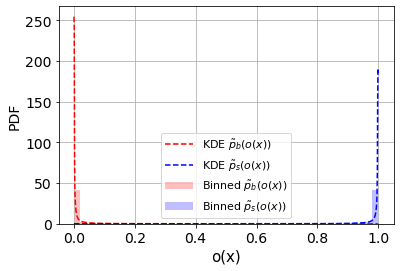

Z_KDE_bins :  24.739936531129683


B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  10000

 If  10100  =  1009    then the proposed range has to be extended
n_ensembles (actual):  9233

 This may take long... 



KeyboardInterrupt: 

In [21]:
dim=8

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
background_X_8 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)
signal_X_8 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))
dim8 = np.concatenate((background_X_8,signal_X_8))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['dim8'] = dim8.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 + (NP_shuf[ll,7]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 + (NP_shuf[ll,7]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 + (SM_shuf[ll,7]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 + (SM_shuf[ll,7]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [22]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

dim =  8
0.9973305525615517
19.216705971572285
22.06289103671506
23.591770800187124
24.727977136260638
0.0353839488790209
26.16785443330168
0.021271526047871765
24.739936531129683
24.650825182743844
24.671260252733045
9.108075499536744
12.075736817105442
16.376111648022352


In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=9

In [ ]:
dim=9

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
background_X_8 = np.random.normal(-epsilon,1,N)
background_X_9 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)
signal_X_8 = np.random.normal(epsilon,1,N)
signal_X_9 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))
dim8 = np.concatenate((background_X_8,signal_X_8))
dim9 = np.concatenate((background_X_9,signal_X_9))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['dim8'] = dim8.reshape(-1)
df['dim9'] = dim9.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 + (NP_shuf[ll,7]-epsilon)**2 + (NP_shuf[ll,8]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 + (NP_shuf[ll,7]+epsilon)**2 + (NP_shuf[ll,8]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 + (SM_shuf[ll,7]-epsilon)**2 + (SM_shuf[ll,8]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 + (SM_shuf[ll,7]+epsilon)**2 + (SM_shuf[ll,8]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [ ]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

## Dim=10

In [ ]:
dim=10

#######################
# generate the events #
#######################
    
background_X_1 = np.random.normal(-epsilon,1,N)
background_X_2 = np.random.normal(-epsilon,1,N)
background_X_3 = np.random.normal(-epsilon,1,N)
background_X_4 = np.random.normal(-epsilon,1,N)
background_X_5 = np.random.normal(-epsilon,1,N)
background_X_6 = np.random.normal(-epsilon,1,N)
background_X_7 = np.random.normal(-epsilon,1,N)
background_X_8 = np.random.normal(-epsilon,1,N)
background_X_9 = np.random.normal(-epsilon,1,N)
background_X_10 = np.random.normal(-epsilon,1,N)
    
signal_X_1 = np.random.normal(epsilon,1,N)
signal_X_2 = np.random.normal(epsilon,1,N)
signal_X_3 = np.random.normal(epsilon,1,N)
signal_X_4 = np.random.normal(epsilon,1,N)
signal_X_5 = np.random.normal(epsilon,1,N)
signal_X_6 = np.random.normal(epsilon,1,N)
signal_X_7 = np.random.normal(epsilon,1,N)
signal_X_8 = np.random.normal(epsilon,1,N)
signal_X_9 = np.random.normal(epsilon,1,N)
signal_X_10 = np.random.normal(epsilon,1,N)

dim1 = np.concatenate((background_X_1,signal_X_1))
dim2 = np.concatenate((background_X_2,signal_X_2))
dim3 = np.concatenate((background_X_3,signal_X_3))
dim4 = np.concatenate((background_X_4,signal_X_4))
dim5 = np.concatenate((background_X_5,signal_X_5))
dim6 = np.concatenate((background_X_6,signal_X_6))
dim7 = np.concatenate((background_X_7,signal_X_7))
dim8 = np.concatenate((background_X_8,signal_X_8))
dim9 = np.concatenate((background_X_9,signal_X_9))
dim10 = np.concatenate((background_X_10,signal_X_10))

# labels
background_Y = np.zeros(N)
signal_Y = np.ones(N)

# DATA in a single matrix (features + labels)
df = pd.DataFrame()
df['dim1'] = dim1.reshape(-1)
df['dim2'] = dim2.reshape(-1)
df['dim3'] = dim3.reshape(-1)
df['dim4'] = dim4.reshape(-1)
df['dim5'] = dim5.reshape(-1)
df['dim6'] = dim6.reshape(-1)
df['dim7'] = dim7.reshape(-1)
df['dim8'] = dim8.reshape(-1)
df['dim9'] = dim9.reshape(-1)
df['dim10'] = dim10.reshape(-1)
df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

X_gauss = df[['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10']].values 
Y_gauss = df[['Y']].values

X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)


print(X_gauss_train.shape)
print(Y_gauss_train.shape)
print(X_gauss_val.shape)
print(Y_gauss_val.shape)


# PLOT (only 1st feature) to visualize the data
X_gauss_val_SM = []
X_gauss_val_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] ==0:
        X_gauss_val_SM.append(X_gauss_val[i].tolist())
    else:
        X_gauss_val_NP.append(X_gauss_val[i].tolist())    


X_gauss_val_SM = np.array(X_gauss_val_SM)
X_gauss_val_NP = np.array(X_gauss_val_NP)


weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("Fraction of events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.title(r"Gaussian (dim=%0.2d)" % dim,fontsize=14)
plt.show()  




#######################
# CLASSIFIER: XGBoost #
#######################

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


# ROC
fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

store_AUC.append(roc_auc_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"Gaussian (dim=%0.2d) - XGBoost" % dim,fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(Y_gauss_val)):
    if Y_gauss_val[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{(dim=%0.2d)}$' % dim, fontsize=14)
plt.show()





# INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES

# center of each bin

binsSM_mid = []
binsNP_mid = []

for i in range(len(binsSM)-1):
    binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )
    
for i in range(len(binsNP)-1):
    binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )
    

# get the width of each bin
bin_width_SM = binsSM[1] - binsSM[0]
bin_width_NP = binsNP[1] - binsNP[0]
   
    
# Interpolation, cubic
fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')


# Normalize

def fcubic_XG_SM_norm(x):
    return fcubic_XG_SM(x)/bin_width_SM

def fcubic_XG_NP_norm(x):
    return fcubic_XG_NP(x)/bin_width_NP


print('Classification score interpolation:')
# x to plot
xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)

plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Network output",fontsize=16)
plt.ylabel("pdf",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

print('\n ----------------------------------------- \n')








##################################################
# CLASSIFIER OUTPUT BINNED POISON LOG-LIKELIHOOD #
##################################################

# 10 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(10), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(10), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_10bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_10bins.append(Z_bins_XG_10bins)

print('Z_XG 10 bins: ', Z_bins_XG_10bins)
print('\n ----------------------------------------- \n')




##############################

# 25 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(25), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(25), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_25bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_25bins.append(Z_bins_XG_25bins)

print('Z_XG 25 bins: ', Z_bins_XG_25bins)
print('\n ----------------------------------------- \n')




##############################

# 50 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_50bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_50bins.append(Z_bins_XG_50bins)

print('Z_XG 50 bins: ', Z_bins_XG_50bins)
print('\n ----------------------------------------- \n')




##############################

# 100 BINS

print('BINNED CLASSIFIER OUTPUT')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)


# Les't find the number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_ensembles_sig = len(pred_XG_NP) / S_expected



#Let's find out the expected number of B and S events in each bin:

# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])

# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
hist_back_noceros = []
for i in range(len(hist_back)):
    if hist_back[i]!=0:
        hist_back_noceros.append(hist_back[i])

min_back = min(hist_back_noceros)

# replace the zeros
for i in range(len(hist_back)):
    if hist_back[i]==0:
        hist_back[i] = min_back

# now divide by the number of possible ensembles
back_prom = hist_back/N_ensembles_back



# same for signal
hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
sig_prom = hist_sig/N_ensembles_sig



# then the signif Z^binned-Asimov:
Z_bins_XG_100bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

store_Z_bins_XG_100bins.append(Z_bins_XG_100bins)

print('Z_XG 100 bins: ', Z_bins_XG_100bins)
print('\n ----------------------------------------- \n')








###################################
# TRUE PDF LIKELIHOOD (GAUSSIANS) #
###################################

print('TRUE PDF LIKELIHOOD (GAUSSIANS):')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print('S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('This may take long...')


#############################
# NOW LETS APPLY THE METHOD #
#############################
muhat_selected_list = []
q_muhat = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

#         # SIGNAL events in an ensemble
#         NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

#         prob_NP_given_B = [] # p_b(S_ensemble)
#         prob_NP_given_S = [] # p_s(S_ensemble)

#         for ll in range(len(NP_shuf)):
#             prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-epsilon)**2 + (NP_shuf[ll,1]-epsilon)**2 + (NP_shuf[ll,2]-epsilon)**2 + (NP_shuf[ll,3]-epsilon)**2 + (NP_shuf[ll,4]-epsilon)**2 + (NP_shuf[ll,5]-epsilon)**2 + (NP_shuf[ll,6]-epsilon)**2 + (NP_shuf[ll,7]-epsilon)**2 + (NP_shuf[ll,8]-epsilon)**2 + (NP_shuf[ll,9]-epsilon)**2 ) ) )
#             prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+epsilon)**2 + (NP_shuf[ll,1]+epsilon)**2 + (NP_shuf[ll,2]+epsilon)**2 + (NP_shuf[ll,3]+epsilon)**2 + (NP_shuf[ll,4]+epsilon)**2 + (NP_shuf[ll,5]+epsilon)**2 + (NP_shuf[ll,6]+epsilon)**2 + (NP_shuf[ll,7]+epsilon)**2 + (NP_shuf[ll,8]+epsilon)**2 + (NP_shuf[ll,9]+epsilon)**2 ) ) )


        # BACKGROUND events in an ensemble
        SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

        prob_SM_given_B = [] # p_b(B_ensemble)
        prob_SM_given_S = [] # p_s(B_ensemble)

        for ll in range(len(SM_shuf)):
            prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-epsilon)**2 + (SM_shuf[ll,1]-epsilon)**2 + (SM_shuf[ll,2]-epsilon)**2 + (SM_shuf[ll,3]-epsilon)**2 + (SM_shuf[ll,4]-epsilon)**2 + (SM_shuf[ll,5]-epsilon)**2 + (SM_shuf[ll,6]-epsilon)**2 + (SM_shuf[ll,7]-epsilon)**2 + (SM_shuf[ll,8]-epsilon)**2 + (SM_shuf[ll,9]-epsilon)**2 ) ) )
            prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+epsilon)**2 + (SM_shuf[ll,1]+epsilon)**2 + (SM_shuf[ll,2]+epsilon)**2 + (SM_shuf[ll,3]+epsilon)**2 + (SM_shuf[ll,4]+epsilon)**2 + (SM_shuf[ll,5]+epsilon)**2 + (SM_shuf[ll,6]+epsilon)**2 + (SM_shuf[ll,7]+epsilon)**2 + (SM_shuf[ll,8]+epsilon)**2 + (SM_shuf[ll,9]+epsilon)**2 ) ) )


        # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
        prob_x_given_B = prob_SM_given_B #+ prob_NP_given_B

        # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
        prob_x_given_S = prob_SM_given_S #+ prob_NP_given_S




        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )  ) )



# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
plt.show()


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_gaussian = np.mean(muhat_selected_list)
store_muhat_mean_gaussian.append(muhat_mean_gaussian)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_gaussian = abs(q_muhat_median)**0.5
store_Z_gaussian.append(Z_gaussian)

print('muhat mean: ', muhat_mean_gaussian)
print('median q_muhat: ', q_muhat_median)
print('Z_gaussian: ', Z_gaussian)


print('\n ------------------------------------ \n')


    
    
    


    
#########
#  KDE  #
#########  

print(' MLL + KDE ')

# FIND THE BANDWIDTH

bandwidth = np.logspace(-4.0, 0, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth




# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel='epanechnikov', bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel='epanechnikov', bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)





# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP







# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
#plt.savefig('images/' + 'Ndimgaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()





# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# B events in each bin: 
# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])


# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back


# S events in each bin: 
# value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
Sd = SsqrtB*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])


# Z value:
#Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

store_Z_KDE_bins.append(Z_KDE_bins)

print('Z_KDE_bins : ', Z_KDE_bins)



    
    
    
#############
# MLL + KDE #
#############
    
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


# the first part is the same as before, but we repeat it, it is not the expensive part

print('\n')
print('B_expected: ', B_expected)
print('S_expected: ', S_expected)
print(r'S/$\sqrt{B}$: ', SsqrtB)
print('n_ensembles (initial): ', n_ensembles)


# to construct ensembles B and S events are taken from Poisson distributions
mu = S_expected + B_expected


# Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

# around the mean its populated so let's try (proposed range to be checked)
list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
to_check = len(list_events_per_ensembles)

# I want at least one ensemble populated
list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



# Remove from the list the elements without at least 1 ensemble possible
for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] > 1:
        list_events_per_ensembles = list_events_per_ensembles[i:]
        list_nums_ensembles = list_nums_ensembles[i:]
        break


for i in range(len(list_events_per_ensembles)):
    if list_nums_ensembles[i] < 1:
        list_events_per_ensembles = list_events_per_ensembles[:i]
        list_nums_ensembles = list_nums_ensembles[:i]
        break

print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

print('n_ensembles (actual): ', sum(list_nums_ensembles))



# lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

p_berno = S_expected/(S_expected+B_expected)

list_S_per_ensembles = []
list_B_per_ensembles = []

for jj in range(len(list_events_per_ensembles)):
    list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
    list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

######
# NOW I HAVE 4 LISTS:
# list_events_per_ensembles     list with the number of events per ensemble (its a range)
# list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
# list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
# list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
######



print('\n This may take long... \n')


# NOW LETS APPLY THE METHOD

muhat_selected_list = []
q_muhat = []
q_muhat_mu0 = []

for bb in range(len(list_nums_ensembles)):

    for kk in range(list_nums_ensembles[bb]):

        # KDE
        ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

        KDE_SM_pred_SM_shuf = []
        KDE_NP_pred_SM_shuf = []

        for i in ran_ind:
            KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
            KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

        KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
        KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



        # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

        # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
        prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )





        # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
        # WE NEED TO ESTIMATE mu_hat for this particular ensemble
        # we are going to obtain a mu_hat with a grid of values for this particular ensemble



        mu_hat_condition_equal_1 = []

        # grid, mu_hat is around 1
        muhat_test = np.arange(0., 1.5, 0.1).tolist()

        B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

        for vv in range(len(muhat_test)):

            mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



        muhat_selected = 0.01

        # from the grid, select the mu_hat such that the condition is equal to 1
        if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 > 0:
                    muhat_selected = muhat_test[ll]
                    break


        if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
            for ll in range(len(mu_hat_condition_equal_1)):
                if mu_hat_condition_equal_1[ll] -1 < 0:
                    muhat_selected = muhat_test[ll]
                    break


        muhat_selected_list.append(muhat_selected)



        # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
        # and append it (we need the median over lots of ensembles)
        #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected) + sum( [np.log( 1 + ( (muhat_selected*S_expected/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
        # EXCLUSION:
        q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (muhat_selected*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )
        q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected ) - sum( [np.log( ( (B_expected*y) + (S_expected*x) ) / ( (B_expected*y) + (0.*S_expected*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
) )


# Histogram of q_muhats

weights = np.ones_like(q_muhat)/float(len(q_muhat))
nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
#plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
plt.ylabel("Fraction of ensembles",fontsize=16)
plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected),fontsize=14)
plt.grid()
#plt.legend(fontsize=14)
plt.show()


# Finally calculate muhat_mean and Z_gaussian

# Remove nan if any
q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

q_muhat_median_mu0 = np.median(q_muhat_mu0)

Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


# Finally calculate muhat_mean and Z_gaussian
muhat_mean_MLL_KDE = np.mean(muhat_selected_list)
store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

# Remove nan if any
q_muhat = [x for x in q_muhat if x == x]

q_muhat_median = np.median(q_muhat)

Z_KDE = abs(q_muhat_median)**0.5
store_Z_MLL_KDE.append(Z_KDE)

print('muhat mean: ', muhat_mean_MLL_KDE)
print('median q_muhat: ', q_muhat_median)
print('Z_KDE: ', Z_KDE)
print('Z_KDE mu=0: ', Z_KDE_mu0)

print('\n -------------------------------- \n')
    
    

    
    
    
    
    
    
#######################################
# Working points, counting over 1 bin #
#######################################

print('Working points, counting over 1 bin:')

# BACKGROUND 

# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

# number of signal ensembles
S_ensembles = int(len(pred_XG_NP)/S_expected)

# shorten the number of S events so I get an integer number of ensembles
pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected) * S_expected]

XG_NP_passWP0 = 0
XG_NP_passWP1 = 0
XG_NP_passWP2 = 0

for i in range(len(pred_XG_NP_entero)):
    if pred_XG_NP_entero[i] > WP[0]:
        XG_NP_passWP0 += 1
    if pred_XG_NP_entero[i] > WP[1]:
        XG_NP_passWP1 += 1
    if pred_XG_NP_entero[i] > WP[2]:
        XG_NP_passWP2 += 1

Z_WP0 = ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5
Z_WP1 = ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5
Z_WP2 = ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5


# save the results Z_binned after WP
SrootB_WP0.append( Z_WP0 )
SrootB_WP1.append( Z_WP1 )
SrootB_WP2.append( Z_WP2 )

print('S_expected = ', S_expected)
print('WP: 0     S/B**0.5= ', S_expected/(B_expected)**0.5)
print('WP: ', WP[0], '    S/B**0.5= ', Z_WP0 )
print('WP: ', WP[1], '    S/B**0.5= ', Z_WP1 )
print('WP: ', WP[2], '    S/B**0.5= ', Z_WP2 )
print('------------------------')

In [ ]:
print('dim = ', dim)

print(roc_auc_xg)

print(Z_bins_XG_10bins)
print(Z_bins_XG_25bins)
print(Z_bins_XG_50bins)
print(Z_bins_XG_100bins)

print(muhat_mean_gaussian)
print(Z_gaussian)

print(muhat_mean_MLL_KDE)
print(Z_KDE_bins)
print(Z_KDE)
print(Z_KDE_mu0)

print(Z_WP0)
print(Z_WP1)
print(Z_WP2)

In [ ]:
# To use if you dont want to run everything again. Store the previous results
store_AUC.append()

store_Z_bins_XG_10bins.append()
store_Z_bins_XG_25bins.append()
store_Z_bins_XG_50bins.append()
store_Z_bins_XG_100bins.append()

store_muhat_mean_gaussian.append()
store_Z_gaussian.append()

store_muhat_mean_MLL_KDE.append()
store_Z_KDE_bins.append()
store_Z_MLL_KDE.append()
store_Z_MLL_KDE_mu0.append()

SrootB_WP0.append()
SrootB_WP1.append()
SrootB_WP2.append()

In [7]:
# FINAL STORED VALUES
print(store_AUC)

print(store_Z_bins_XG_10bins)
print(store_Z_bins_XG_25bins)
print(store_Z_bins_XG_50bins)
print(store_Z_bins_XG_100bins)

print(store_muhat_mean_gaussian)
print(store_Z_gaussian)

print(store_muhat_mean_MLL_KDE)
print(store_Z_KDE_bins)
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(SrootB_WP0)
print(SrootB_WP1)
print(SrootB_WP2)

[0.8384457278422903, 0.9188200169436449, 0.9568027993283393, 0.9756967676709098, 0.9864997115366075, 0.992184964711926, 0.9954452995451999, 0.9972748612403355, 0.9984446606375205, 0.9990604625206047]
[4.882075062535776, 7.5564761576650525, 9.842341744368149, 11.832024143456604, 13.476854881012109, 15.50176054049332, 17.22930050959646, 19.04855680700004, 20.954058464742, 22.176715386068388]
[5.196997125038241, 8.772936719278523, 11.843706108475804, 14.536211276880849, 16.59660396515209, 18.549028039346183, 20.152359247376697, 21.969965565943415, 23.642530463997012, 24.462429839164855]
[5.265512718593254, 9.343924180387756, 12.892549029013695, 15.989860458713451, 18.423931369037014, 20.238496021520497, 22.07307463985863, 23.63148080987359, 25.298379489836652, 25.859085023928966]
[5.395648349463419, 9.52437876839145, 13.501768557801219, 16.76883686195438, 19.515404704178053, 21.6151151240554, 23.283926790907294, 24.687673242091044, 25.950644159662616, 26.999077757748427]
[0.10382324271634

In [8]:
# FINAL STORED VALUES
# To use if you dont want to run everything again. Its the previous results

store_AUC = [0.8384457278422903, 0.9188200169436449, 0.9568027993283393, 0.9756967676709098, 0.9864997115366075, 0.992184964711926, 0.9954452995451999, 0.9972748612403355, 0.9984446606375205, 0.9990604625206047]

store_Z_bins_XG_10bins = [4.882075062535776, 7.5564761576650525, 9.842341744368149, 11.832024143456604, 13.476854881012109, 15.50176054049332, 17.22930050959646, 19.04855680700004, 20.954058464742, 22.176715386068388]
store_Z_bins_XG_25bins = [5.196997125038241, 8.772936719278523, 11.843706108475804, 14.536211276880849, 16.59660396515209, 18.549028039346183, 20.152359247376697, 21.969965565943415, 23.642530463997012, 24.462429839164855]
store_Z_bins_XG_50bins = [5.265512718593254, 9.343924180387756, 12.892549029013695, 15.989860458713451, 18.423931369037014, 20.238496021520497, 22.07307463985863, 23.63148080987359, 25.298379489836652, 25.859085023928966]
store_Z_bins_XG_100bins = [5.395648349463419, 9.52437876839145, 13.501768557801219, 16.76883686195438, 19.515404704178053, 21.6151151240554, 23.283926790907294, 24.687673242091044, 25.950644159662616, 26.999077757748427]

store_muhat_mean_gaussian = [0.10382324271634356, 0.052334019278674315, 0.03406260153796165, 0.05826925159753058, 0.025603812412000434, 0.016874255388281162, 0.036542835481425326, 0.028918011480558864, 0.011253113830824219, 0.005415357955160836]
store_Z_gaussian = [5.3216207533240265, 9.725792131415734, 14.38292711982977, 17.376594695129373, 20.86928257848743, 23.162384327256895, 24.632791222720424, 26.275000964201904, 27.56436912482226, 28.32567937225149]

store_muhat_mean_MLL_KDE = [0.0849994584642045, 0.0488248673237301, 0.03867648651575869, 0.030466803855734866, 0.026697714718942923, 0.04084262969782302, 0.03065092602621033, 0.03673778836781111, 0.02867973573053179, 0.03395429437885844]
store_Z_KDE_bins = [5.399468154318034, 9.726968328320485, 14.046800722587163, 17.637796330068813, 21.267306361565545, 23.536917625019708, 26.04812797762233, 27.67002806236784, 28.939375166803245, 29.59923341225974]
store_Z_MLL_KDE = [5.463276651343913, 9.834504787905248, 14.12244744171103, 17.694275958674964, 20.682507192318244, 22.771023809467724, 24.833100266182154, 26.2097331164975, 27.448945550410727, 28.248880698816762]
store_Z_MLL_KDE_mu0 = [5.468342895767612, 9.849100340901577, 14.176464045152304, 17.748192146551922, 20.749560622497924, 22.699580390421048, 24.943045922543245, 26.40119830909822, 27.532133216088162, 28.353432381755304]

SrootB_WP0 = [2.844174211259831, 3.6515364785817526, 4.567092299472045, 5.563667835735541, 6.709027069786913, 7.794478762899605, 9.027817837374412, 10.493345098587342, 12.161883493457948, 13.861944685979052]
SrootB_WP1 = [3.454761772023722, 4.664640567340399, 5.936731282336633, 7.194332804127141, 8.695902247577347, 10.247498610346534, 12.04299343136188, 13.944233847450489, 16.196488506034022, 18.50470269082072]
SrootB_WP2 = [3.9905883226077568, 5.9910785191701095, 7.799641102929628, 9.443095974162299, 11.523988856216807, 13.79665393696402, 16.414255661039196, 18.776118280824655, 22.08278629178897, 25.33184269415051]

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


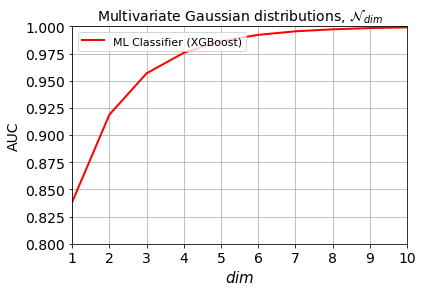

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


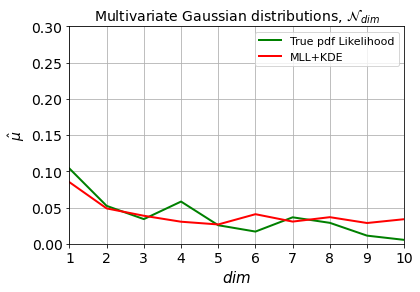

Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode
Substituting symbol N from STIXNonUnicode


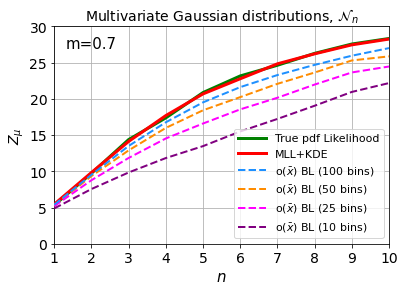

In [10]:
#########
# PLOTS #
#########

dim = [1,2,3,4,5,6,7,8,9,10]

plt.figure()
lw = 2

plt.plot(dim, store_AUC, '-', color='red', lw=lw, label=r'ML Classifier (XGBoost)')

plt.xlim([1, 10])
plt.ylim([0.8, 1.0])
#plt.xscale('log')
#plt.axes().set_aspect(0.7)
plt.xlabel('$dim$', fontsize=15)
plt.ylabel('AUC', fontsize=14)
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc="upper left", fontsize=11)
#plt.savefig('images/' + 'AUCgaussians.pdf', format="pdf", bbox_inches="tight")
plt.show()




plt.figure()
lw = 2

plt.plot(dim, store_muhat_mean_gaussian, '-', color='green', lw=lw, label='True pdf Likelihood')
plt.plot(dim, store_muhat_mean_MLL_KDE, '-', color='red', lw=lw, label='MLL+KDE')

plt.xlim([1, 10])
plt.ylim([0.0, 0.3])
#plt.xscale('log')
#plt.axes().set_aspect(0.7)
plt.xlabel('$dim$', fontsize=15)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{dim}$', fontsize=14)
plt.legend(loc="upper right", fontsize=11)
#plt.savefig('images/' + '2gaussian-muhatvsmu.pdf', format="pdf", bbox_inches="tight")
plt.show()





plt.figure()
lw = 2

#plt.plot(dim, store_Z_KDE_bins, '--', color='purple', lw=3, label=r'Binned KDE output', zorder=5 )
plt.plot(dim, store_Z_gaussian, '-', color='green', lw=3, label=r'True pdf Likelihood' ,zorder=5)
plt.plot(dim, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL+KDE', zorder=5 )
#plt.plot(dim, store_Z_MLL_KDE_mu0, ':', color='gray', lw=3, label=r'MLL+KDE mu=0', zorder=5 )
plt.plot(dim, store_Z_bins_XG_100bins, '--', color='dodgerblue', lw=2, label=r'o$(\bar{x})$ BL (100 bins)' ,zorder=10)
plt.plot(dim, store_Z_bins_XG_50bins, '--', color='darkorange', lw=2, label=r'o$(\bar{x})$ BL (50 bins)' ,zorder=5)
plt.plot(dim, store_Z_bins_XG_25bins, '--', color='magenta', lw=2, label=r'o$(\bar{x})$ BL (25 bins)' ,zorder=5)
plt.plot(dim, store_Z_bins_XG_10bins, '--', color='purple', lw=2, label=r'o$(\bar{x})$ BL (10 bins)' ,zorder=5)

#plt.plot(dim, SrootB_WP2, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
#plt.plot(dim, SrootB_WP1, '--', color='magenta', lw=lw)#, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
#plt.plot(dim, SrootB_WP0, '--', color='navy', lw=lw)#, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )

plt.xlim([1, 10])
plt.ylim([0., 30])
#plt.yscale('log')
plt.text(1.3, 27, 'm=0.7', fontsize = 15)
plt.xlabel('$n$', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axhline(y=SsqrtB, color='black', linestyle=':')#, label=r'$S/\sqrt{B}$, WP=0')
plt.grid()
plt.title('Multivariate Gaussian distributions, $\mathcal{N}_{n}$', fontsize=14)
plt.legend(loc="lower right", fontsize=11, handlelength=2.5)
plt.savefig('images/' + '2gaussian-Z-dims-m07.pdf', format="pdf", bbox_inches="tight")
plt.show()